### PAPER's Figure 6, 7 and 10

- f1=HI
- f2=WL

In [1]:
#############################################
#BASIC PACKAGES
import sys,time,os
from copy import deepcopy as dcopy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#############################################
#PATH TO SCRIPTS FOLDER
path = '/data/AMARINS/CMBWLxHI-CODES/scripts/'
sys.path.insert(1, path)
import cross_functions_theory      as cxft
import cross_functions_simulations as cxfs
# it's required healpy  (https://healpy.readthedocs.io/en/latest/index.html)
import handling_data               as hdata
# It is required the healpy python package
import healpy as hp
#############################################
## MATPLOTLIB FEATURES
from matplotlib import cm
font = {'weight' : 'bold','size'   : 22}
mpl.rc('font', **font)
mpl.rc('font',   size=209)  #set defaults so that the plots are readable
mpl.rc('axes',   titlesize=20)
mpl.rc('axes',   labelsize=20)
mpl.rc('xtick',  labelsize=20)
mpl.rc('ytick',  labelsize=20)
mpl.rc('legend', fontsize =20)
mpl.rc('figure', titlesize=20)
mpl.rc('text',   usetex=True)
## FURTHER MATPLOTLIB FEATURES
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.colors import ListedColormap
colors = ['#ff0000', "#41b6c4",  "olivedrab", "darkviolet", ]
my_cmap = ListedColormap(colors, name="my_cmap")
font_dict = {'family': 'serif', 'color':  None,  'weight': 'bold','size': 30}
#############################################
## NAMASTER (https://namaster.readthedocs.io/en/latest/)
import pymaster as nmt
del_l  = 20
nside  = 256
##############################
b    = nmt.NmtBin.from_nside_linear(nside, nlb=del_l)
leff = b.get_effective_ells()
feff = leff*(leff+1)/2/np.pi

# LOW-Z

In [5]:
########
# GAL
prefix      = 'lowz_nch30_980_1260_nch18_24'
#prefix      = 'lowz_nch30_980_1260_nch25_30'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA/postprocessed/fullsky/{}'.format(prefix)
timej       = time.time() 
for i,ICs in enumerate(['ns3','ns4','ns5']):   
    dirpath_out_ns = os.path.join(dirpath_out,ICs)
    dirpath_sims   = os.path.join(dirpath_out_ns,'simulations')
    dirpath_rec    = os.path.join(dirpath_out_ns,'estimated')  
    dirpath_cross  = os.path.join(dirpath_out_ns,'cross')    
    L0_dir         = "sim0"

    W_fg_rec  = np.loadtxt(os.path.join(dirpath_rec, L0_dir ,'filter_fg.txt' )).T#
    cl_cx_field1_field2_sim_sim = np.loadtxt(os.path.join(dirpath_sims,L0_dir,  'cl_cx_field1_field2_sim_sim.txt')).T[1:,:]    
    cl_cx_field1_field2_rec_sim = np.loadtxt(os.path.join(dirpath_cross, L0_dir, 'cl_cx_field1_field2_rec_sim.txt')).T[1:,:]    

    if not i:
        CLs_dict_gal = {ICs: {'W_fg_rec':W_fg_rec,'cl_cx_f1_f2_sim_sim':cl_cx_field1_field2_sim_sim,'cl_cx_f1_f2_rec_sim':cl_cx_field1_field2_rec_sim}}
    else:
        CLs_dict_gal[ICs] = { 'W_fg_rec':W_fg_rec, 'cl_cx_f1_f2_sim_sim':cl_cx_field1_field2_sim_sim,'cl_cx_f1_f2_rec_sim':cl_cx_field1_field2_rec_sim}      
    del cl_cx_field1_field2_sim_sim, cl_cx_field1_field2_rec_sim, W_fg_rec
########
# CMB
prefix      = 'lowz_nch30_980_1260'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA/postprocessed/fullsky/{}'.format(prefix)
timej       = time.time() 
for i,ICs in enumerate(['ns3','ns4','ns5']):   
    dirpath_out_ns = os.path.join(dirpath_out,ICs)
    dirpath_sims   = os.path.join(dirpath_out_ns,'simulations')
    dirpath_rec    = os.path.join(dirpath_out_ns,'estimated')  
    dirpath_cross  = os.path.join(dirpath_out_ns,'cross')    
    L0_dir         = "sim0"

    W_fg_rec  = np.loadtxt(os.path.join(dirpath_rec, L0_dir ,'filter_fg.txt' )).T#
    cl_cx_field1_field2_sim_sim = np.loadtxt(os.path.join(dirpath_sims,L0_dir,  'cl_cx_field1_field2_sim_sim.txt')).T[1:,:]    
    cl_cx_field1_field2_rec_sim = np.loadtxt(os.path.join(dirpath_cross, L0_dir, 'cl_cx_field1_field2_rec_sim.txt')).T[1:,:]    

    if not i:
        CLs_dict_cmb = {ICs: {'W_fg_rec':W_fg_rec,'cl_cx_f1_f2_sim_sim':cl_cx_field1_field2_sim_sim,'cl_cx_f1_f2_rec_sim':cl_cx_field1_field2_rec_sim}}
    else:
        CLs_dict_cmb[ICs] = { 'W_fg_rec':W_fg_rec, 'cl_cx_f1_f2_sim_sim':cl_cx_field1_field2_sim_sim,'cl_cx_f1_f2_rec_sim':cl_cx_field1_field2_rec_sim}      
    del cl_cx_field1_field2_sim_sim, cl_cx_field1_field2_rec_sim, W_fg_rec
########
print('Processing time: {0:.4f} seg'.format(time.time()-timej))      

Processing time: 0.0094 seg


'/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_lowz_nch30_980_1260_ch19_part1.png'

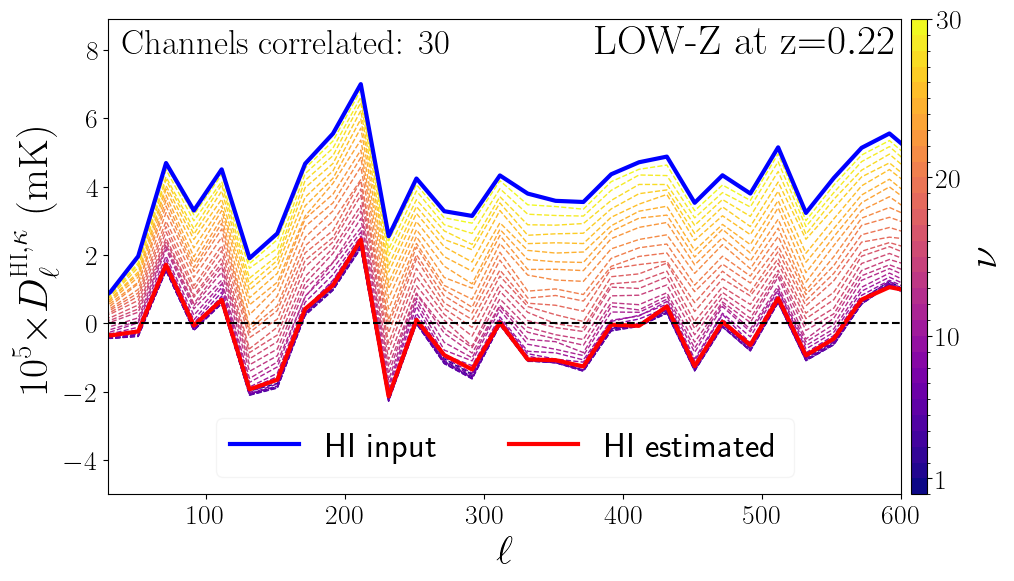

In [6]:
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.1,right=1.6)
ax    = plt.subplot(grid[0,0])
######Leakages######################################################
savefigs = True
ins='ns3'; ich=19
numin,numax,nch = 980,1260,30
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
fact_exp = 5
fact     = 10**fact_exp
CLs_dict = dcopy(CLs_dict_cmb)
ncorr    = 30
############################################################
c    = np.arange(0, nch + 1)
cmap = plt.get_cmap("plasma", nch)
norm = mpl.colors.BoundaryNorm(np.arange(len(c)),len(c))
sm   = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([]) 
############################################################
for j,jbin in enumerate(range(nch)):
    lkg = np.dot(CLs_dict[ins]['W_fg_rec'][ich,j:], CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][j:,:])
    ax.plot( leff, fact*feff*b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][ich,:]-lkg), lw=1.,  c=cmap(jbin),label=None, ls='dashed')
ax.plot(leff, fact*feff*b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][ich]) , c='blue', lw=3, label='HI input')
ax.plot(leff, fact*feff*b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][ich]) , c='red' , lw=3, ls='solid', label='HI estimated')   
ax.set_ylim(-5, 8.9); ax.set_xlim(30,600)
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$\times D_{\ell}^{\LARGE{\textrm{HI}},\tiny{\kappa}}\ (\textrm{mK})$', fontsize=30)#($\kappa, \textrm{HI}$)')
ax.set_xlabel(r'$\ell$', fontsize=30)#($\kappa, \textrm{HI}$)')
ax.axhline(y=0, ls='dashed', color='black')
ax.set_yscale('linear'); ax.set_xscale('linear')
###
ax.text(x=550-170, y=7.9, s=r'$\textrm{LOW-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
ax.text(x=210-170, y=7.9, s=r'$\textrm{Channels correlated: } '+' {}$'.format(ncorr), fontdict=font_dict, size=25)
ax.legend( fontsize=25, loc='lower center', ncols=2,framealpha=0.2)
###########################################################
cticks = np.linspace(0, nch-1, 4, dtype=np.int8)+1
cbar   = fig.colorbar(sm,ax=ax, ticks=cticks,  pad=0.01, aspect=30)
cbar.set_label(label=r'$\nu$',size=30)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_{}_ch{}_part1.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_lowz_nch30_980_1260_ch19_part2.png'

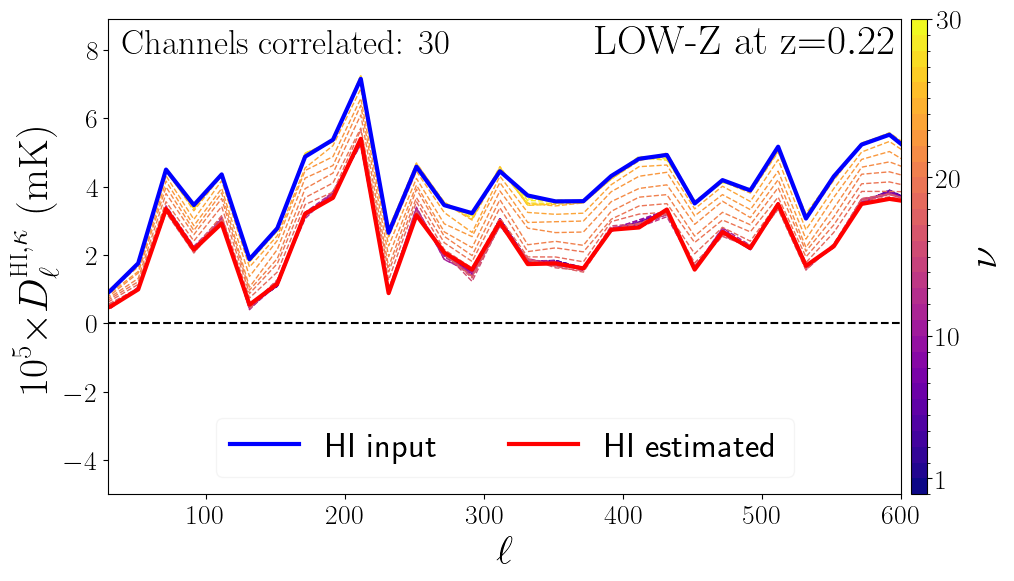

In [7]:
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.1,right=1.6)
ax    = plt.subplot(grid[0,0])
######Leakages######################################################
savefigs = True
ins='ns3'; ich=19
numin,numax,nch = 980,1260,30
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
fact_exp = 5
fact     = 10**fact_exp
CLs_dict = dcopy(CLs_dict_gal)
ncorr    = 30
############################################################
c    = np.arange(0, nch + 1)
cmap = plt.get_cmap("plasma", nch)
norm = mpl.colors.BoundaryNorm(np.arange(len(c)),len(c))
sm   = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([]) 
############################################################
for j,jbin in enumerate(range(nch)):
    lkg = np.dot(CLs_dict[ins]['W_fg_rec'][ich,j:], CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][j:,:])
    ax.plot( leff, fact*feff*b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][ich,:]-lkg), lw=1.,  c=cmap(jbin),label=None, ls='dashed')
ax.plot(leff, fact*feff*b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][ich]) , c='blue', lw=3, label='HI input')
ax.plot(leff, fact*feff*b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][ich]) , c='red' , lw=3, ls='solid', label='HI estimated')   
ax.set_ylim(-5, 8.9); ax.set_xlim(30,600)
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$\times D_{\ell}^{\LARGE{\textrm{HI}},\tiny{\kappa}}\ (\textrm{mK})$', fontsize=30)#($\kappa, \textrm{HI}$)')
ax.set_xlabel(r'$\ell$', fontsize=30)#($\kappa, \textrm{HI}$)')
ax.axhline(y=0, ls='dashed', color='black')
ax.set_yscale('linear'); ax.set_xscale('linear')
###
ax.text(x=550-170, y=7.9, s=r'$\textrm{LOW-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
ax.text(x=210-170, y=7.9, s=r'$\textrm{Channels correlated: } '+' {}$'.format(ncorr), fontdict=font_dict, size=25)
ax.legend( fontsize=25, loc='lower center', ncols=2,framealpha=0.2)
###########################################################
cticks = np.linspace(0, nch-1, 4, dtype=np.int8)+1
cbar   = fig.colorbar(sm,ax=ax, ticks=cticks,  pad=0.01, aspect=30)
cbar.set_label(label=r'$\nu$',size=30)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_{}_ch{}_part2.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

In [22]:
HDU         = 1 #0: Olivari data. 1: Marins data
pathdir_fg  = '/data/AMARINS/MAPS/FG256'
filename_fg = 'FG_I_256_980mhz1260mhz_30bins_full_nonfrps_L0.fits'#'foreground_cube_FG_256.fits'
MFG_true    = hdata.getmap(dirpath_=pathdir_fg, filename_=filename_fg, healpix_readingformat=0, hdu=HDU)
#MASK        = np.ones_like(MFG_true[0])
##
prefix = 'lowz'
suffix = 'nch30_980_1260'
filepath_field1 = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_HI_cl_{}.txt'.format(prefix, suffix)
filepath_field2 = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_CMBWL_cl_{}.txt'.format(prefix, suffix)
filepath_cross  = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_CMBWLxHI_cl_{}.txt'.format(prefix, suffix)  
#########################################
clf1 = np.loadtxt(filepath_field1).T[1:,:]
clf2 = np.loadtxt(filepath_field2).T[1:,:]
clcx = np.loadtxt(filepath_cross ).T[1:,:] 
nch  = int(clcx.shape[0])

In [23]:
ns=3
ich=19
numin,numax,nch = 980,1260,30
#depende multo da seed para baixos L
CLs_dicts_plot = cxfs.get_data_plot_residuals(ns=ns, ich=ich, nu_min=numin, nu_max=numax, seed_k=8001, seed_hi=9000, tax=1010, clf1_=clf1, clf2_=clf2, clcx_=clcx, nside=256, fg_maps=MFG_true)

'/data/AMARINS/CMBWLxHI-CODES/images/Dl_hi_lkg_lowz_ch__19_980_part1.png'

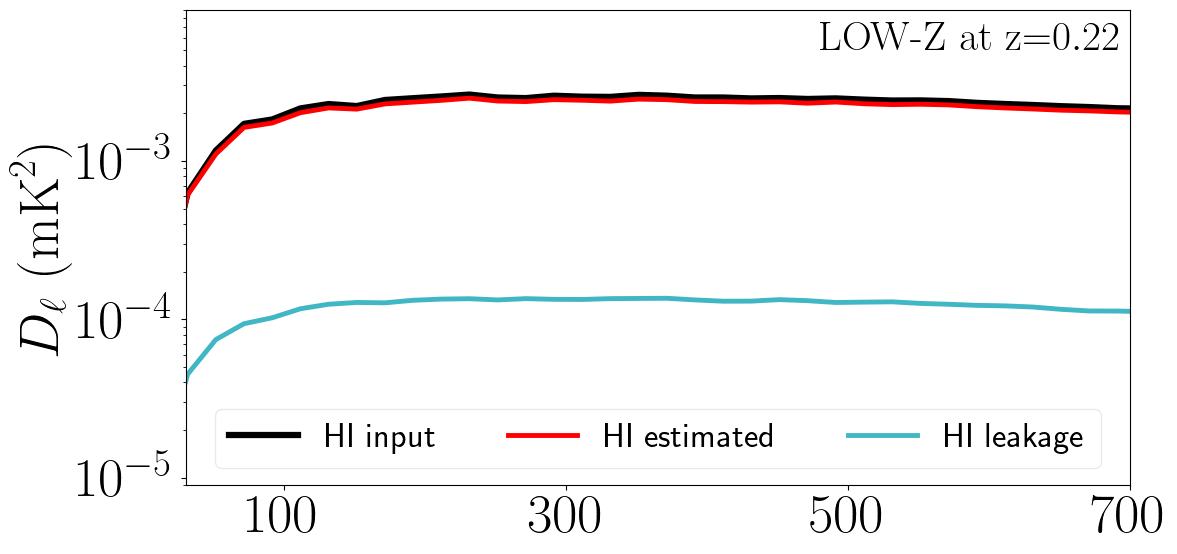

In [24]:
fig, ax  = plt.subplots(nrows=1, ncols=1)
plt.subplots_adjust(top=1.1,right=1.6)
############################################################
savefigs = False
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
iLw      = [4*[3.5], 4*[3], 4*[2.5]]
iLs      = [4*['solid'], 4*['dashed'], 4*['dotted']]
cticks   = [100,300,500,700]
CLs_dict = dcopy(CLs_dicts_plot)
############################################################
ax.plot(  leff, feff*b.bin_cell(CLs_dict['HI']['sim'][ich]), c='black'   , lw=iLw[0][0]+1, ls=iLs[0][0], label='HI input')
ax.plot(  leff, feff*b.bin_cell(CLs_dict['HI']['rec'][ich]), c=my_cmap(0), lw=iLw[0][1]  , ls=iLs[0][1], label='HI estimated')  
ax.plot(  leff, feff*b.bin_cell(CLs_dict['HI']['lkg'][ich]), c=my_cmap(1), lw=iLw[0][2]  , ls=iLs[0][2], label='HI leakage')  
#ax.plot(  leff, feff*b.bin_cell(CLs_dict['FG']['lkg'][ich]), c=my_cmap(2), lw=iLw[0][3]  , ls=iLs[0][3], label='FG leakage')  
ax.set_xlim(30,700)
ax.set_ylim(0.9e-5,9e-3)#ax.set_xticks([])
ax.set_ylabel(r'$D_{\ell}\ (\textrm{mK}^2)$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=40)
ax.set_yscale('log'); ax.set_xscale('linear')
ax.set_xticks(cticks)
###
ax.text(x=650-170, y=5e-3, s=r'$\textrm{LOW-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
ax.legend( fontsize=25, loc='lower center', ncols=3,framealpha=0.4)
###
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_hi_lkg_{}_ch__{}_{}_part1.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/Dl_hi_lkg_lowz_ch__19_980_part2.png'

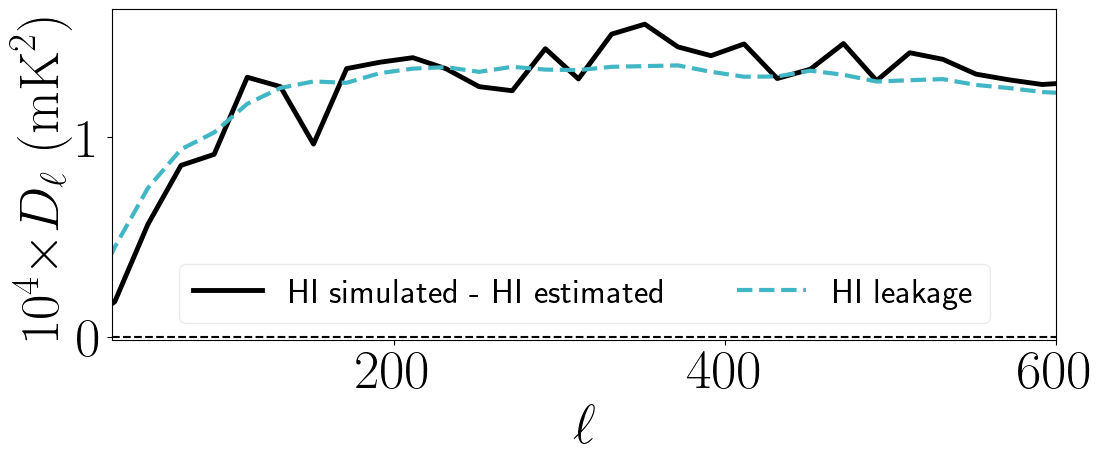

In [11]:
fig, ax  = plt.subplots(nrows=1, ncols=1)
plt.subplots_adjust(top=0.8,right=1.6)
############################################################
savefigs = True
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
iLw      = [3.5, 3, 2.5]
iLs      = ['solid','dashed','dotted']
cticks   = [100,300,500,700]
fact_exp = 4
fact     = 10**fact_exp
CLs_dict = dcopy(CLs_dicts_plot)
############################################################
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict['HI']['sim'][ich]-CLs_dict['HI']['rec'][ich]), c='black'   , lw=iLw[0], ls='solid' , label='HI simulated - HI estimated')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict['HI']['lkg'][ich])                           , c=my_cmap(1), lw=iLw[1], ls='dashed', label='HI leakage')  
#ax.axhline(y=0, ls='dashed', color='black')
#####
ax.set_yscale('linear'); ax.set_xscale('linear')
ax.set_xlim(30,600)
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$\times D_{\ell}\ (\textrm{mK}^2)$', fontsize=40)#($\kappa, \textrm{HI}$)')
plt.xlabel(r'$\ell$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.tick_params(axis='both', labelsize=40)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend( fontsize=25, loc='lower center', ncols=2,framealpha=0.4)
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_hi_lkg_{}_ch__{}_{}_part2.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

# HIGH-Z

In [13]:
########
# GAL
prefix = 'highz_nch70_350_1050_nch45_50'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA/postprocessed/fullsky/{}'.format(prefix)
timej       = time.time() 
for i,ICs in enumerate(['ns3','ns4','ns5']):   
    dirpath_out_ns = os.path.join(dirpath_out,ICs)
    dirpath_sims   = os.path.join(dirpath_out_ns,'simulations')
    dirpath_rec    = os.path.join(dirpath_out_ns,'estimated')  
    dirpath_cross  = os.path.join(dirpath_out_ns,'cross')    
    L0_dir         = "sim0"

    W_fg_rec  = np.loadtxt(os.path.join(dirpath_rec, L0_dir ,'filter_fg.txt' )).T#
    cl_cx_field1_field2_sim_sim = np.loadtxt(os.path.join(dirpath_sims,L0_dir,  'cl_cx_field1_field2_sim_sim.txt')).T[1:,:]    
    cl_cx_field1_field2_rec_sim = np.loadtxt(os.path.join(dirpath_cross, L0_dir, 'cl_cx_field1_field2_rec_sim.txt')).T[1:,:]    

    if not i:
        CLs_dict_gal = {ICs: {'W_fg_rec':W_fg_rec,'cl_cx_f1_f2_sim_sim':cl_cx_field1_field2_sim_sim,'cl_cx_f1_f2_rec_sim':cl_cx_field1_field2_rec_sim}}
    else:
        CLs_dict_gal[ICs] = { 'W_fg_rec':W_fg_rec, 'cl_cx_f1_f2_sim_sim':cl_cx_field1_field2_sim_sim,'cl_cx_f1_f2_rec_sim':cl_cx_field1_field2_rec_sim}      
    del cl_cx_field1_field2_sim_sim, cl_cx_field1_field2_rec_sim, W_fg_rec
########
# CMB
prefix = 'highz_nch70_350_1050'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA/postprocessed/fullsky/{}'.format(prefix)
timej       = time.time() 
for i,ICs in enumerate(['ns3','ns4','ns5']):   
    dirpath_out_ns = os.path.join(dirpath_out,ICs)
    dirpath_sims   = os.path.join(dirpath_out_ns,'simulations')
    dirpath_rec    = os.path.join(dirpath_out_ns,'estimated')  
    dirpath_cross  = os.path.join(dirpath_out_ns,'cross')    
    L0_dir         = "sim0"

    W_fg_rec  = np.loadtxt(os.path.join(dirpath_rec, L0_dir ,'filter_fg.txt' )).T#
    cl_cx_field1_field2_sim_sim = np.loadtxt(os.path.join(dirpath_sims,L0_dir,  'cl_cx_field1_field2_sim_sim.txt')).T[1:,:]    
    cl_cx_field1_field2_rec_sim = np.loadtxt(os.path.join(dirpath_cross, L0_dir, 'cl_cx_field1_field2_rec_sim.txt')).T[1:,:]    

    if not i:
        CLs_dict_cmb = {ICs: {'W_fg_rec':W_fg_rec,'cl_cx_f1_f2_sim_sim':cl_cx_field1_field2_sim_sim,'cl_cx_f1_f2_rec_sim':cl_cx_field1_field2_rec_sim}}
    else:
        CLs_dict_cmb[ICs] = { 'W_fg_rec':W_fg_rec, 'cl_cx_f1_f2_sim_sim':cl_cx_field1_field2_sim_sim,'cl_cx_f1_f2_rec_sim':cl_cx_field1_field2_rec_sim}      
    del cl_cx_field1_field2_sim_sim, cl_cx_field1_field2_rec_sim, W_fg_rec
########
print('Processing time: {0:.4f} seg'.format(time.time()-timej))      

Processing time: 0.0202 seg


'/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_highz_nch70_350_1050_ch49_part1.png'

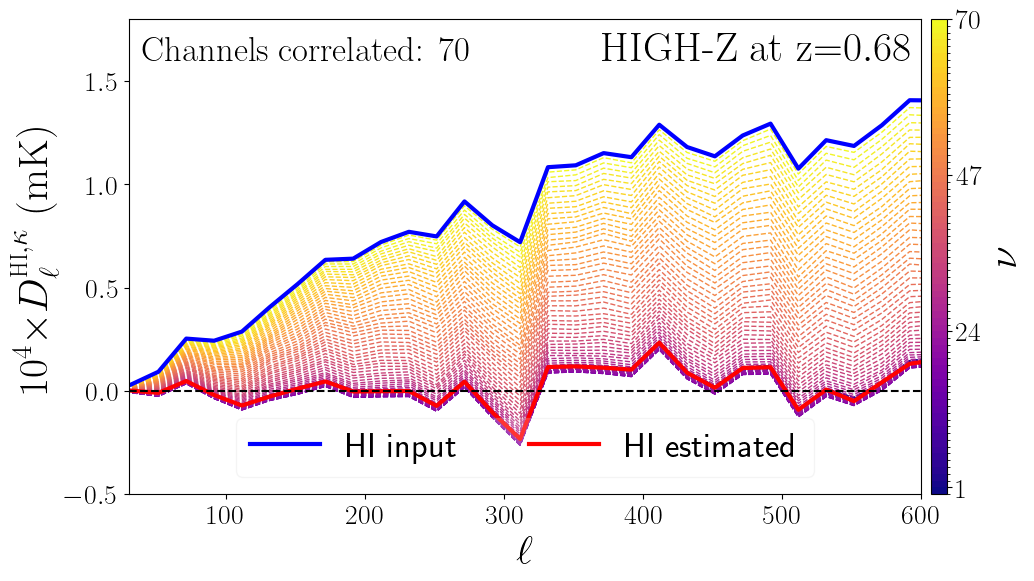

In [14]:
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.1,right=1.6)
ax    = plt.subplot(grid[0,0])
######Leakages######################################################
savefigs = True
ins='ns4'; ich=49
numin,numax,nch = 350,1050,70
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
fact_exp = 4
fact     = 10**fact_exp
CLs_dict = dcopy(CLs_dict_cmb)
ncorr    = 70
############################################################
c    = np.arange(0, nch + 1)
cmap = plt.get_cmap("plasma", nch)
norm = mpl.colors.BoundaryNorm(np.arange(len(c)),len(c))
sm   = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([]) 
############################################################
for j,jbin in enumerate(range(nch)):
    lkg = np.dot(CLs_dict[ins]['W_fg_rec'][ich,j:], CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][j:,:])
    ax.plot( leff, fact*feff*b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][ich,:]-lkg), lw=1.,  c=cmap(jbin),label=None, ls='dashed')
ax.plot(leff, fact*feff*b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][ich]) , c='blue', lw=3, label='HI input')
ax.plot(leff, fact*feff*b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][ich]) , c='red' , lw=3, ls='solid', label='HI estimated')   
ax.set_ylim(-0.5, 1.8); ax.set_xlim(30,600)
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$\times D_{\ell}^{\LARGE{\textrm{HI}},\tiny{\kappa}}\ (\textrm{mK})$', fontsize=30)#($\kappa, \textrm{HI}$)')
ax.set_xlabel(r'$\ell$', fontsize=30)#($\kappa, \textrm{HI}$)')
ax.axhline(y=0, ls='dashed', color='black')
ax.set_yscale('linear'); ax.set_xscale('linear')
###
ax.text(x=550-180, y=1.6, s=r'$\textrm{HIGH-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
ax.text(x=210-170, y=1.6, s=r'$\textrm{Channels correlated: } '+' {}$'.format(ncorr), fontdict=font_dict, size=25)
ax.legend( fontsize=25, loc='lower center', ncols=2,framealpha=0.2)
###########################################################
cticks = np.linspace(0, nch-1, 4, dtype=np.int8)+1
cbar   = fig.colorbar(sm,ax=ax, ticks=cticks,  pad=0.01, aspect=30)
cbar.set_label(label=r'$\nu$',size=30)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_{}_ch{}_part1.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_highz_nch70_350_1050_ch49_part2.png'

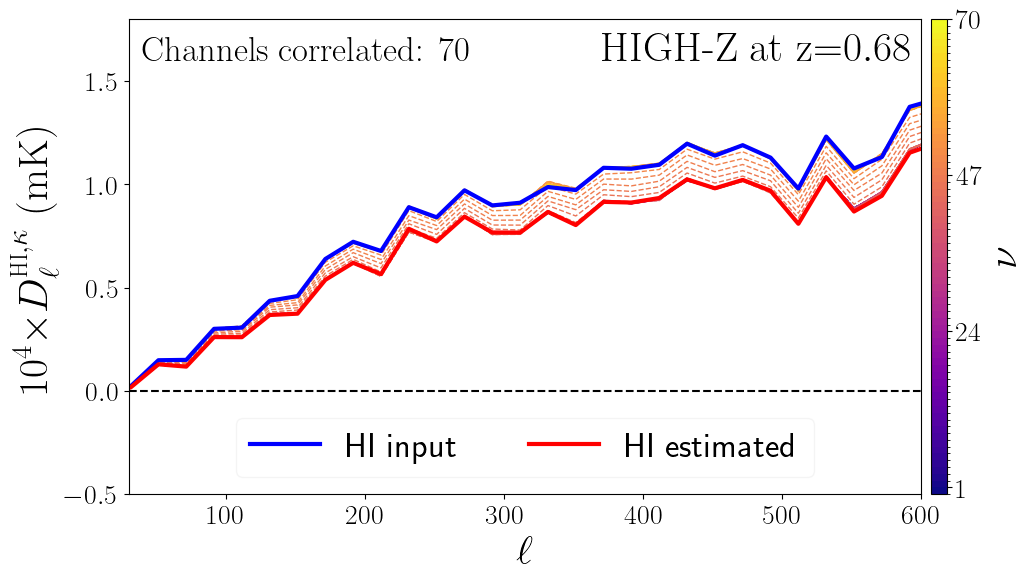

In [16]:
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.1,right=1.6)
ax    = plt.subplot(grid[0,0])
######Leakages######################################################
savefigs = True
ins='ns4'; ich=49
numin,numax,nch = 350,1050,70
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
fact_exp = 4
fact     = 10**fact_exp
CLs_dict = dcopy(CLs_dict_gal)
ncorr    = 70
############################################################
c    = np.arange(0, nch + 1)
cmap = plt.get_cmap("plasma", nch)
norm = mpl.colors.BoundaryNorm(np.arange(len(c)),len(c))
sm   = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([]) 
############################################################
for j,jbin in enumerate(range(nch)):
    lkg = np.dot(CLs_dict[ins]['W_fg_rec'][ich,j:], CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][j:,:])
    ax.plot( leff, fact*feff*b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][ich,:]-lkg), lw=1.,  c=cmap(jbin),label=None, ls='dashed')
ax.plot(leff, fact*feff*b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][ich]) , c='blue', lw=3, label='HI input')
ax.plot(leff, fact*feff*b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][ich]) , c='red' , lw=3, ls='solid', label='HI estimated')   
ax.set_ylim(-0.5, 1.8); ax.set_xlim(30,600)
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$\times D_{\ell}^{\LARGE{\textrm{HI}},\tiny{\kappa}}\ (\textrm{mK})$', fontsize=30)#($\kappa, \textrm{HI}$)')
ax.set_xlabel(r'$\ell$', fontsize=30)#($\kappa, \textrm{HI}$)')
ax.axhline(y=0, ls='dashed', color='black')
ax.set_yscale('linear'); ax.set_xscale('linear')
###
ax.text(x=550-180, y=1.6, s=r'$\textrm{HIGH-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
ax.text(x=210-170, y=1.6, s=r'$\textrm{Channels correlated: } '+' {}$'.format(ncorr), fontdict=font_dict, size=25)
ax.legend( fontsize=25, loc='lower center', ncols=2,framealpha=0.2)
###########################################################
cticks = np.linspace(0, nch-1, 4, dtype=np.int8)+1
cbar   = fig.colorbar(sm,ax=ax, ticks=cticks,  pad=0.01, aspect=30)
cbar.set_label(label=r'$\nu$',size=30)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_{}_ch{}_part2.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

In [17]:
HDU         = 1 #0: Olivari data. 1: Marins data
pathdir_fg  = '/data/AMARINS/MAPS/FG256'
filename_fg = 'FG_I_256_350mhz1050mhz_70bins_full_nonfrps_L0.fits'#'foreground_cube_FG_256.fits'
MFG_true    = hdata.getmap(dirpath_=pathdir_fg, filename_=filename_fg, healpix_readingformat=0, hdu=HDU)
#
prefix = 'highz'
suffix = 'nch70_350_1050'
filepath_field1 = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_HI_cl_{}.txt'.format(prefix, suffix)
filepath_field2 = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_CMBWL_cl_{}.txt'.format(prefix, suffix)
filepath_cross  = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_CMBWLxHI_cl_{}.txt'.format(prefix, suffix)  
#########################################
clf1 = np.loadtxt(filepath_field1).T[1:,:]
clf2 = np.loadtxt(filepath_field2).T[1:,:]
clcx = np.loadtxt(filepath_cross ).T[1:,:] 
nch  = int(clcx.shape[0])

In [18]:
ns=3
ich=47
numin,numax,nch = 350,1050,70
CLs_dicts_plot = cxfs.get_data_plot_residuals(ns=ns, ich=ich, nu_min=numin, nu_max=numax, seed_k=8000, seed_hi=9000, tax=300, clf1_=clf1, clf2_=clf2, clcx_=clcx, nside=256, fg_maps=MFG_true)

'/data/AMARINS/CMBWLxHI-CODES/images/Dl_hi_lkg_highz_ch__47_350_part1.png'

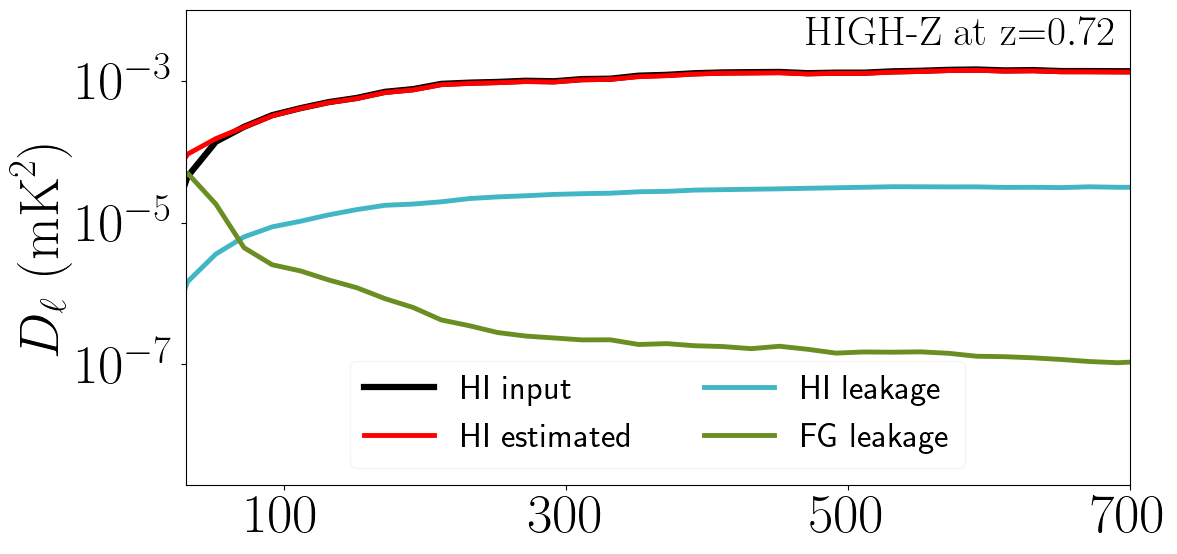

In [19]:
fig, ax  = plt.subplots(nrows=1, ncols=1)
plt.subplots_adjust(top=1.1,right=1.6)
############################################################
savefigs = True
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
iLw      = [4*[3.5], 4*[3], 4*[2.5]]
iLs      = [4*['solid'], 4*['dashed'], 4*['dotted']]
cticks   = [100,300,500,700]
CLs_dict = dcopy(CLs_dicts_plot)
############################################################
ax.plot(  leff, feff*b.bin_cell(CLs_dict['HI']['sim'][ich]), c='black'   , lw=iLw[0][0]+1, ls=iLs[0][0], label='HI input')
ax.plot(  leff, feff*b.bin_cell(CLs_dict['HI']['rec'][ich]), c=my_cmap(0), lw=iLw[0][1]  , ls=iLs[0][1], label='HI estimated')  
ax.plot(  leff, feff*b.bin_cell(CLs_dict['HI']['lkg'][ich]), c=my_cmap(1), lw=iLw[0][2]  , ls=iLs[0][2], label='HI leakage')  
ax.plot(  leff, feff*b.bin_cell(CLs_dict['FG']['lkg'][ich]), c=my_cmap(2), lw=iLw[0][3]  , ls=iLs[0][3], label='FG leakage')  
ax.set_xlim(30,700)
ax.set_ylim(0.2e-8,9.9e-3)#ax.set_xticks([])
ax.set_ylabel(r'$D_{\ell}\ (\textrm{mK}^2)$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=40)
ax.set_yscale('log'); ax.set_xscale('linear')
ax.set_xticks(cticks)
###
ax.text(x=650-180, y=3.2e-3, s=r'$\textrm{HIGH-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
ax.legend( fontsize=25, loc='lower center', ncols=2,framealpha=0.2)
###
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_hi_lkg_{}_ch__{}_{}_part1.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/Dl_hi_lkg_highz_ch__47_350_part2.png'

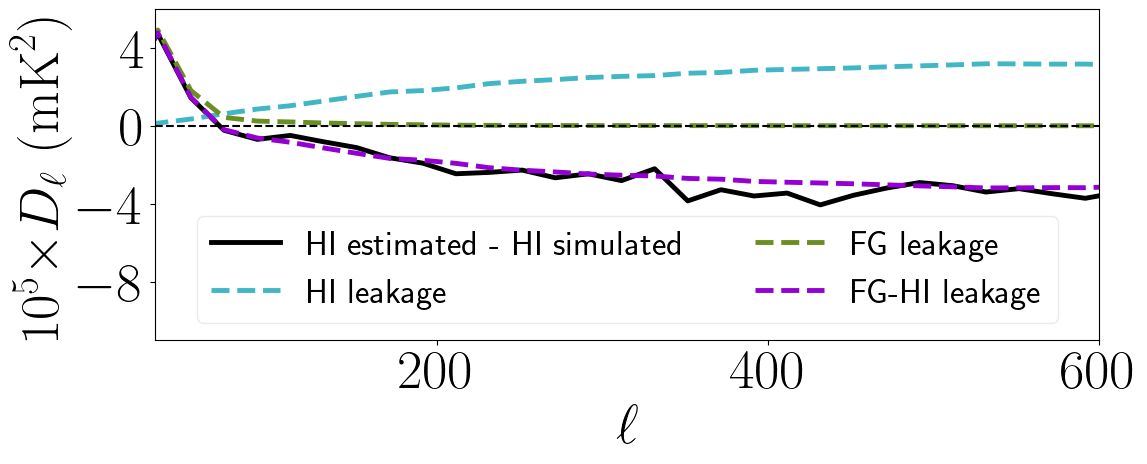

In [21]:
fig, ax  = plt.subplots(nrows=1, ncols=1)
plt.subplots_adjust(top=0.8,right=1.6)
############################################################
savefigs = True
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
iLw      = [4*[3.5], 4*[3], 4*[2.5]]
iLs      = [4*['solid'], 4*['dashed'], 4*['dotted']]
cticks   = [100,300,500,700]
fact_exp = 5
fact     = 10**fact_exp
CLs_dict = dcopy(CLs_dicts_plot)
############################################################
#ax.plot(  leff, feff*b.bin_cell(Cl_hi_dicts[ins]['sim'][i]) , c='black', lw=iLw[0][0], ls=iLs[0][0], label='HI input (ch {})'.format(i))

ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict['HI']['rec'][ich]-CLs_dict['HI']['sim'][ich]) , c='black'   , lw=iLw[0][0], ls='solid' , label='HI estimated - HI simulated')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict['HI']['lkg'][ich])                            , c=my_cmap(1), lw=iLw[0][1], ls='dashed', label='HI leakage')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict['FG']['lkg'][ich])                            , c=my_cmap(2), lw=iLw[0][2], ls='dashed', label='FG leakage')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict['FG']['lkg'][ich]-CLs_dict['HI']['lkg'][ich]) , c=my_cmap(3), lw=iLw[0][3], ls='dashed', label='FG-HI leakage')  
    #ax.plot(  leff, feff*b.bin_cell(Cl_hi_dicts[ins]['lkg'][i]+Cl_hi_dicts[ins]['lkg'][i]) , c=cm.Dark2(ii) , lw=iLw[ii][2], ls='dashed',)  
    #ax.plot(  leff, feff*b.bin_cell(Cl_fg_dicts[ins]['lkg'][i]) , c=cm.Set1(ii)  , lw=iLw[ii][3], ls='dotted', label='FG leakage (ch {} - ns {})'.format(i,ins))  
ax.axhline(y=0, ls='dashed', color='black')
#####
ax.set_yscale('linear'); ax.set_xscale('linear')
ax.set_ylim(-11, 6)
ax.set_yticks([-8,-4,0,4])
ax.set_xlim(30,600)
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$\times D_{\ell}\ (\textrm{mK}^2)$', fontsize=40)#($\kappa, \textrm{HI}$)')
plt.xlabel(r'$\ell$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.tick_params(axis='both', labelsize=40)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend( fontsize=25, loc='lower center', ncols=2,framealpha=0.4)
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_hi_lkg_{}_ch__{}_{}_part2.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname